In [5]:
import os
os.chdir('..')

import pickle
import pandas as pd
import datetime as dt
import numpy as np

from matplotlib import style

from keras.models import load_model
import tweepy
import json

from src.predict import predict
from src.decode_sentiment import decode_sentiment
import src.twitter_credentials 
from src.fetch_tweets import fetch_tweets
from src.twitter_plots import plot_pie, plot_trend

pd.set_option('display.max_colwidth', -1)

Using TensorFlow backend.


In [6]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [7]:
from src.twitter_plots import plot_pie, plot_trend

## Setup tweet api

In [8]:
auth = tweepy.OAuthHandler(src.twitter_credentials.consumer_key, src.twitter_credentials.consumer_secret)
auth.set_access_token(src.twitter_credentials.access_token, src.twitter_credentials.access_token_secret)
api = tweepy.API(auth)

## Fetch target's twitter data

In [9]:
screen_name = 'CPCatapult'
df_tweets = fetch_tweets(screen_name,api)
df_tweets['Date'] = pd.to_datetime(df_tweets['Date'].dt.date)
df_tweets['free_text'] = df_tweets['free_text'].apply(lambda row_text: row_text.decode("utf-8"))

## Load models

In [10]:
tokenizer = pickle.load(open('../models/tokenizer.pkl', "rb"))
model = load_model('../models/model.h5')

## Predict polarity group and underlying score

In [11]:
df_tweets['polarity'] = df_tweets['free_text'].apply(lambda row_text: predict(row_text,
                                                                              SEQUENCE_LENGTH=300,
                                                                              saved_tokenizer=tokenizer,
                                                                              saved_model=model)['label'])
df_tweets['score'] = df_tweets['free_text'].apply(lambda row_text: predict(row_text,
                                                                           SEQUENCE_LENGTH=300,
                                                                           saved_tokenizer=tokenizer,
                                                                           saved_model=model)['score'])

## Twitter stats

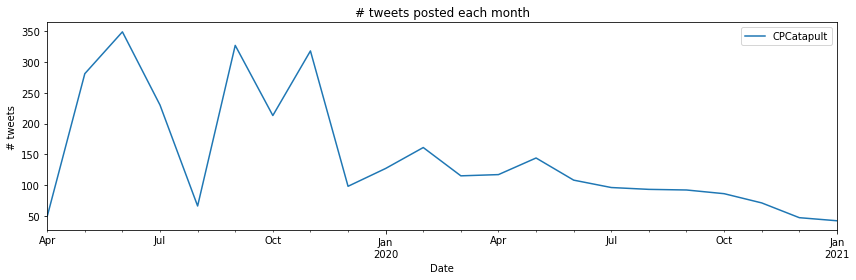

In [21]:
plot_trend(df_tweets, screen_name)

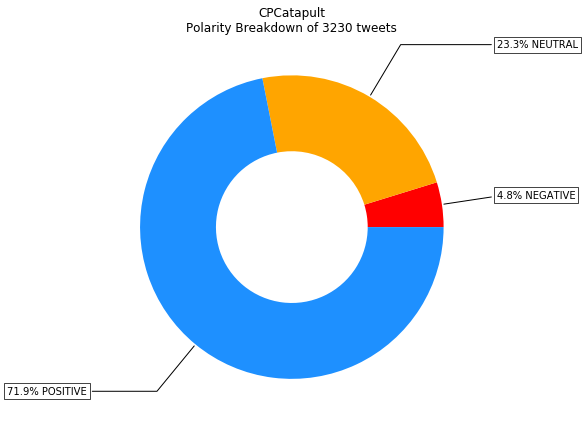

In [33]:
plot_pie(df_tweets, screen_name)

## Sentiment classification example

In [17]:
text = df_tweets.sample(n=1)['free_text'].values[-1]
print('tweet:',text,'\n')
predict(text=text,SEQUENCE_LENGTH=300,saved_tokenizer=tokenizer,saved_model=model)

tweet: Erin Walsh wraps up the morning with a plug for forthcoming #FutureOfHousing events. If you're interested in any of… https://t.co/AviNrcbaE0 



{'label': 'POSITIVE',
 'score': 0.9819260239601135,
 'elapsed_time': 0.016949176788330078}

## 5 examples per sentiment group

In [18]:
df_tweets.groupby('polarity').head(5).sort_values('score',ascending=False)

,Date,free_text,polarity,score
5,2021-01-27,🥁Today we’re also excited to announce that our new #NetZeroPlaces Innovation Brief has launched on our brand new 𝗖𝗼… https://t.co/iuwjwWxKfi,POSITIVE,0.990318
3,2021-01-28,On 2nd Feb we will be hosting an Application &amp; Support webinar for #startups looking to join our Intelligent Mobili… https://t.co/IpuD4xxQqK,POSITIVE,0.970456
4,2021-01-28,Our 4th #SmartPort 🚢Use Case with @RHDHV @Port_of_Tyne &amp; @Equinor focuses on the provision of offshore power with t… https://t.co/rzh7v7zbMy,POSITIVE,0.872490
1,2021-01-29,"RT @AngokaCyber: The Unmanned Aircraft Systems Authentication System (#UASAS) project brings together ANGOKA, @CranfieldUni and @CPCatapult…",POSITIVE,0.855288
2,2021-01-29,"✈️ Can we reduce our #AirTravel carbon footprint? Read about best low carbon practices in #aviation in ""Net Zero Ai… https://t.co/zZ8o2dcUvg",POSITIVE,0.830100
11,2021-01-21,Last chance to register for our MK:5G Connecting Communities webinar taking place tomorrow at 10am. Hear from the c… https://t.co/vUpT7DI6yq,NEUTRAL,0.764049
0,2021-01-29,There is still time to join our #IntelligentMobilityAccelerator Application &amp; Support Webinar on Tuesday 2nd Feb 💡… https://t.co/G31ApG6lVS,NEUTRAL,0.760012
14,2021-01-20,We are delighted to be working alongside AGS Airports Ltd and the other 12 consortium members on #projectCAELUS as… https://t.co/WIjTgDbHcn,NEUTRAL,0.733885
8,2021-01-26,"RT @Catapult_UK: 📣 @CPCatapult &amp; @SatAppsCatapult are part of the #AirspaceOfTheFuture consortium, alongside:\n\n@thalesgroup\n@InmarsatGlobal…",NEUTRAL,0.730907
9,2021-01-25,Want to learn more about innovating for Europe's largest #infrastructure project? Join us this Thursday to find out… https://t.co/NUR7Cokka1,NEUTRAL,0.520796
